In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sb
import scipy.stats as stats
from pydataset import data
from sklearn.model_selection import train_test_split
import env
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import wrangle_reg
import warnings
warnings.filterwarnings('ignore')

# Exercises

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

    1. Select a dataset with a continuous target variable.

    2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

    3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.


#### Acquire 

In [2]:
df= data('swiss')

In [3]:
df.head(3)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


In [4]:
# Taking a look at the distribution of my data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fertility,47.0,70.142553,12.491697,35.00,64.700,70.40,78.450,92.5
Agriculture,47.0,50.659574,22.711218,1.20,35.900,54.10,67.650,89.7
Examination,47.0,16.489362,7.977883,3.00,12.000,16.00,22.000,37.0
Education,47.0,10.978723,9.615407,1.00,6.000,8.00,12.000,53.0
Catholic,47.0,41.143830,41.704850,2.15,5.195,15.14,93.125,100.0
Infant.Mortality,47.0,19.942553,2.912697,10.80,18.150,20.00,21.700,26.6


In [5]:
# All of my data is already numeric, so that's helpful
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [6]:
# Confirming that I don't have missing values to fill or drop
df.isna().sum()

Fertility           0
Agriculture         0
Examination         0
Education           0
Catholic            0
Infant.Mortality    0
dtype: int64

#### Split

In [7]:
# Splitting my data into train, validate, and test groups
train_val, test = train_test_split(df, test_size=.2, random_state=123)
train, val = train_test_split(train_val, 
                                   test_size=.3, 
                                   random_state=123)

In [8]:
train.shape, val.shape, test.shape

((25, 6), (12, 6), (10, 6))

#### Exploration

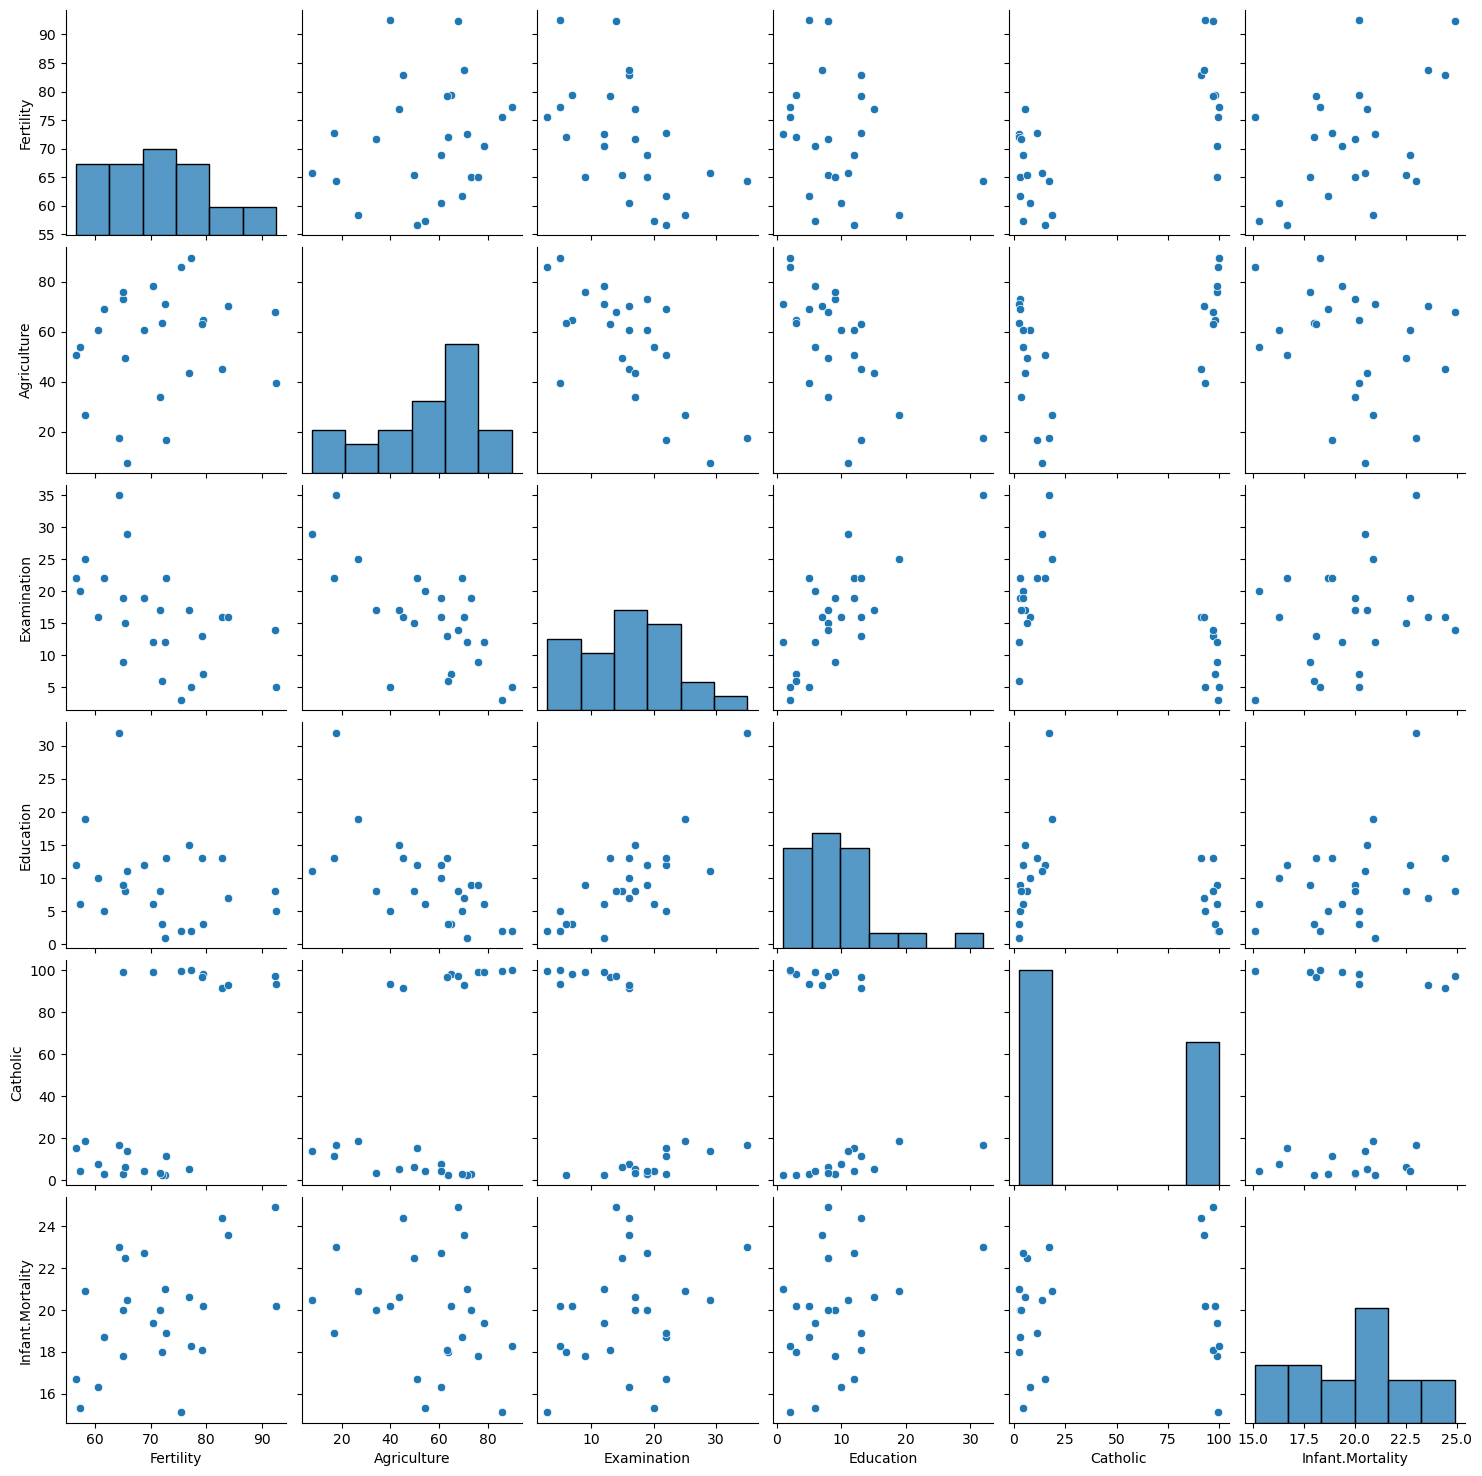

In [9]:
# My exploration and analysis will be done on my train dataset
sb.pairplot(train)

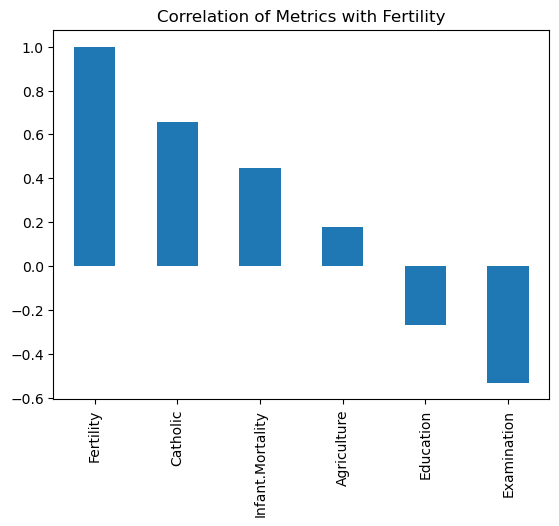

In [10]:
train.corr()['Fertility'].sort_values(ascending= False).plot(kind = 'bar')
plt.title('Correlation of Metrics with Fertility')
plt.show()

In [11]:
X_train = train.drop(columns='Fertility')
X_val = val.drop(columns='Fertility')
X_test = test.drop(columns='Fertility')
y_train = train[['Fertility']]
y_val = val[['Fertility']]
y_test = test[['Fertility']]

In [12]:
X_train.head(3)

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Rolle,60.8,16,10,7.72,16.3
Lavaux,73.0,19,9,2.84,20.0
Nyone,50.9,22,12,15.14,16.7


### Scaling

In [13]:
mms= MinMaxScaler()
X_train_sc= mms.fit_transform(X_train)

In [14]:
X_train_sc = pd.DataFrame(X_train_sc, columns= X_train.columns, index= X_train.index)
X_val_sc = pd.DataFrame(mms.transform(X_val), columns= X_val.columns, index= X_val.index)
X_test_sc = pd.DataFrame(mms.transform(X_test), columns= X_test.columns, index= X_test.index)

In [15]:
X_train_sc.head(3)

,Agriculture,Examination,Education,Catholic,Infant.Mortality
Rolle,0.647561,0.40625,0.290323,0.054508,0.122449
Lavaux,0.796341,0.50000,0.258065,0.004508,0.500000
Nyone,0.526829,0.59375,0.354839,0.130533,0.163265


### Statistical Testing

1. Fertility vs Infant Morality

- H^0: There is no correlation between fertility and infant mortality
- Hypothesis: There is correlation between fertility and infant mortality


2. Fertility vs Education

- H^0: There is no correlation between fertility and Catholicism
- Hypothesis: There is correlation between fertility and Catholicism

3. Fertility vs Agriculture

- H^0: There is no correlation between fertility and agriculture
- Hypothesis: There is correlation between fertility and agriculture

In [16]:
# Fertility vs Infant Mortality
a = 0.05
r, p = stats.pearsonr(train['Fertility'], train['Infant.Mortality'])
if p < a:
    print(f'''P-value:{p}
R: {r}''')
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

P-value:0.024662531207991154
R: 0.44814089055415407
We reject the null hypothesis


In [17]:
# Fertility vs Catholicism
a = 0.05
r, p = stats.pearsonr(train['Fertility'], train['Catholic'])
if p < a:
    print(f'''P-value:{p}
R: {r}''')
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

P-value:0.00035458546338030817
R: 0.6575414656808837
We reject the null hypothesis


In [18]:
# Fertility vs Agriculture
a = 0.05
r, p = stats.pearsonr(train['Fertility'], train['Agriculture'])
if p < a:
    print(f'''P-value:{p}
R: {r}''')
    print('We reject the null hypothesis')
else:
    print(f'''P-value:{p}
R: {r}''')
    print('We fail to reject the null hypothesis')

P-value:0.39951372402365465
R: 0.17619445909341305
We fail to reject the null hypothesis


### Pre-modeling

In [19]:
y_train.Fertility.head()

Rolle      60.5
Lavaux     65.1
Nyone      56.6
Conthey    75.5
Yverdon    65.4
Name: Fertility, dtype: float64

In [30]:
y_train['baseline_mean']= y_train['Fertility'].mean()
y_train['baseline_median']= y_train['Fertility'].median()
y_val['baseline_mean']= y_train['Fertility'].mean()
y_val['baseline_median']= y_train['Fertility'].median()

#RMSE

rmse_mean= mean_squared_error(base_pred, y_train['baseline_mean'], squared=False)
rmse_median= mean_squared_error(base_pred, y_train['baseline_median'], squared=False)
rmse_mean_val= mean_squared_error(y_val['Fertility'], y_val['baseline_mean'], squared=False)
rmse_median_val= mean_squared_error(y_val['Fertility'], y_val['baseline_median'], squared=False)

In [31]:
rmse_mean, rmse_median

(9.773714953895475, 9.775090792417226)

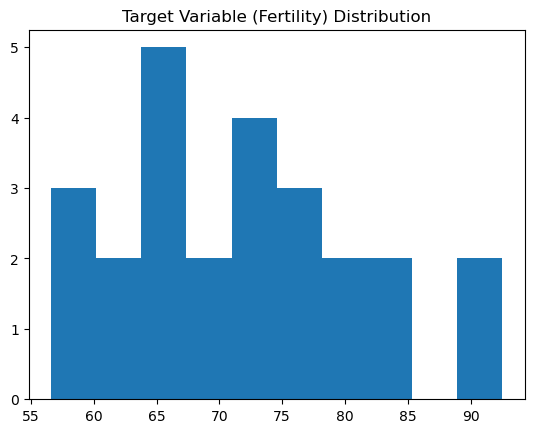

In [32]:
plt.hist(y_train['Fertility'])
plt.title('Target Variable (Fertility) Distribution')
plt.show()

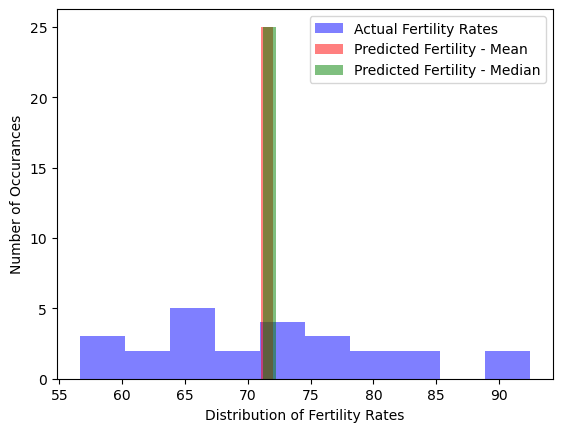

In [40]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.Fertility, color='blue', alpha=.5, label="Actual Fertility Rates")
plt.hist(y_train.baseline_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Fertility - Mean")
plt.hist(y_train.baseline_median, bins=1, color='green', alpha=.5, rwidth=100, label="Predicted Fertility - Median")
plt.ylabel("Number of Occurances")
plt.xlabel('Distribution of Fertility Rates')
plt.legend()
plt.show()

### Modeling

1. Make a dataframe for comparing metrics
2. 

In [23]:
metrics = pd.DataFrame([{ 'Model': 'Baseline Mean',
                         'RMSE Train': rmse_mean,
                         'RMSE Val': rmse_mean_val,
                         'r^2': explained_variance_score(y_val['Fertility'], y_val.baseline_mean)}])

In [24]:
metrics

,Model,RMSE Train,RMSE Val,r^2
0,Baseline Mean,9.773715,14.78101,0.0


In [43]:
# create the model objects

lassie = LassoLars()
tweedie_bird = TweedieRegressor()
polypocket = PolynomialFeatures(degree=5)
lr = LinearRegression(normalize=True)

**Linear Regression**

In [42]:

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lr.fit(X_train, y_train['Fertility'])

# predict train
y_train['fertility_pred_lr'] = lr.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['Fertility'], y_train['fertility_pred_lr'])**(1/2)

# predict validate
y_val['fertility_pred_lr'] = lr.predict(X_val)

# evaluate: rmse
rmse_val = mean_squared_error(y_val['Fertility'], y_val['fertility_pred_lr'])**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_val)


RMSE for OLS using LinearRegression
Training/In-Sample:  4.57104304288927 
Validation/Out-of-Sample:  12.132738217927693


**LassoLars**

In [47]:
# fit the model to our training data
 
lassie.fit(X_train, y_train.Fertility)

# predict train
y_train['Fertility_pred_lars'] = lassie.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Fertility, y_train.Fertility_pred_lars)**(1/2)

# predict validate
y_val['Fertility_pred_lars'] = lassie.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.Fertility, y_val.Fertility_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_val)


RMSE for Lasso + Lars
Training/In-Sample:  8.900787755452747 
Validation/Out-of-Sample:  12.132738217927693


**TweedieRegressor**

In [49]:
# fit the model to our training data
tweedie_bird.fit(X_train, y_train['Fertility'])

# predict train
y_train['Fertility_pred_tw'] = tweedie_bird.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train['Fertility'], y_train['Fertility_pred_tw'])**(1/2)

# predict validate
y_val['Fertility_pred_tw'] = tweedie_bird.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val['Fertility'], y_val['Fertility_pred_tw'])**(1/2)

print("RMSE for GLM using Tweedie\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_val)


RMSE for GLM using Tweedie
Training/In-Sample:  4.631417128031558 
Validation/Out-of-Sample:  12.132738217927693
